In [1]:
import keras.utils
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import time

import keras.backend as K
import pickle

from TinyDataset import TinyImageDataset
from StegModels import CNNModels
import matplotlib.patches as mpatches

2022-06-09 04:43:30.826594: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
keras.utils.set_random_seed(42)

2022-06-09 04:43:32.906964: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-09 04:43:34.389488: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22309 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:19:00.0, compute capability: 8.6
2022-06-09 04:43:34.390072: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22309 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1a:00.0, compute capability: 8.6
2022-06-09 04:43:34.390513: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localho

1/1 [==============================] - 0s 27ms/step
Model Finished Training in: 1.15 m
Model Saved at: model-data/50x12x6x68F_32BS_10EP_relu/
16/16 [==============================] - 1s 44ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


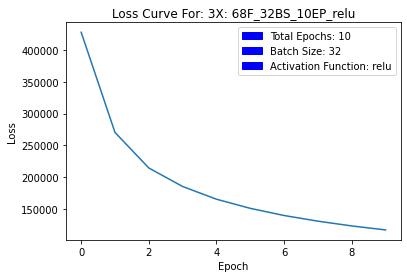

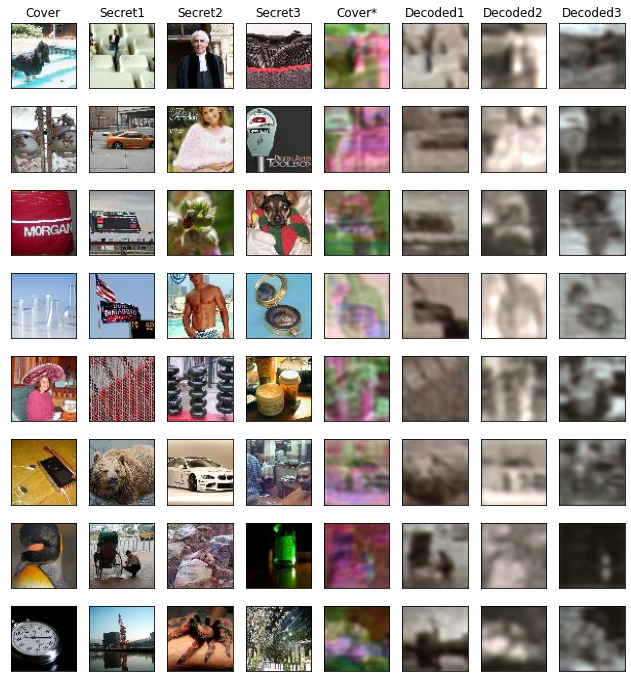

In [3]:
def pickle_file(path, filename, data):
    with open(path + filename, 'wb') as f:
        pickle.dump(data, f)


model_data_path = r"E:/REPORT MODEL DATA"
train_path = os.path.join("datasets/tiny-imagenet-200/", "train")

# beta - constant used to weight the losses of secret and cover images.
beta = 1


def rev_loss(s_true, s_pred):
    return beta * K.sum(K.square(s_true - s_pred))


def cover_loss(c_true, c_pred):
    return K.sum(K.square(c_true - c_pred))


def full_loss(y_true, y_pred):
    # 1 Secret
    s_true, c_true = y_true[..., 0:3], y_true[..., 3:6]
    s_pred, c_pred = y_pred[..., 0:3], y_pred[..., 3:6]

    s_loss = rev_loss(s_true, s_pred)
    c_loss = K.sum(K.square(c_true - c_pred))

    return sum([s_loss, c_loss])


def full_loss2(y_true, y_pred):
    # 2 Secret
    s1_true, s2_true, c_true = y_true[..., 0:3], y_true[..., 3:6], y_true[..., 6:9]
    s1_pred, s2_pred, c_pred = y_pred[..., 0:3], y_pred[..., 3:6], y_pred[..., 6:9]

    s1_loss = rev_loss(s1_true, s1_pred)
    s2_loss = rev_loss(s2_true, s2_pred)
    c_loss = K.sum(K.square(c_true - c_pred))

    return sum([s1_loss, s2_loss, c_loss])


def full_loss3(y_true, y_pred):
    # 3 Secrets
    s1_true, s2_true, s3_true, c_true = y_true[..., 0:3], y_true[..., 3:6], y_true[..., 6:9], y_true[..., 9:12]
    s1_pred, s2_pred, s3_pred, c_pred = y_pred[..., 0:3], y_pred[..., 3:6], y_pred[..., 6:9], y_pred[..., 9:12]

    s1_loss = rev_loss(s1_true, s1_pred)
    s2_loss = rev_loss(s2_true, s2_pred)
    s3_loss = rev_loss(s3_true, s3_pred)
    c_loss = K.sum(K.square(c_true - c_pred))

    return sum([s1_loss, s2_loss, s3_loss, c_loss])


def full_loss4(y_true, y_pred):
    # 3 Secrets
    s1_true, s2_true, s3_true, s4_true, c_true = y_true[..., 0:3], \
                                                 y_true[..., 3:6], \
                                                 y_true[..., 6:9], \
                                                 y_true[..., 9:12], \
                                                 y_true[..., 12:15]

    s1_pred, s2_pred, s3_pred, s4_pred, c_pred = y_pred[..., 0:3], \
                                                 y_pred[..., 3:6], \
                                                 y_pred[..., 6:9], \
                                                 y_pred[..., 9:12], \
                                                 y_pred[..., 12:15]

    s1_loss = rev_loss(s1_true, s1_pred)
    s2_loss = rev_loss(s2_true, s2_pred)
    s3_loss = rev_loss(s3_true, s3_pred)
    s4_loss = rev_loss(s4_true, s4_pred)
    c_loss = K.sum(K.square(c_true - c_pred))

    return sum([s1_loss, s2_loss, s3_loss, s4_loss, c_loss])


def process(_batch_size, _epochs, save_path, save_interval, activation, filter1, filter2, filter3, verbose, _sec1_input,
            _sec2_input, _sec3_input, _cov_input):
    cnn_model = CNNModels()
    input_shape = _sec1_input.shape[1:]

    start_time = time.time()
    _encoder_model, _decoder1_model, _decoder2_model, _decoder3_model, _autoencoder_model = \
        cnn_model.train_three_secret_65_filters(
            batch_size=_batch_size,
            epochs=_epochs,
            path=save_path,
            shape=input_shape,
            rev_loss=rev_loss,
            full_loss=full_loss3,
            secret1_input=_sec1_input,
            secret2_input=_sec2_input,
            secret3_input=_sec3_input,
            cover_input=_cov_input,
            verbose=verbose,
            save_interval=save_interval,
            activation=activation,
            filter1=filter1,
            filter2=filter2,
            filter3=filter3
        )
    end_time = round(time.time() - start_time)

    if end_time > 60:
        end_time = end_time / 60
        print(f"Model Finished Training in: {end_time} m")
    else:
        print(f"Model Finished Training in: {end_time} s")

    return _encoder_model, _decoder1_model, _decoder2_model, _decoder3_model, _autoencoder_model


def train_model(epochs, activation_function, batch_size, filters):
    total_filters = sum(list(filters))
    f1 = filters[0]
    f2 = filters[1]
    f3 = filters[2]

    save_path = f"model-data/50x12x6x{total_filters}F_{batch_size}BS_{epochs}EP_{activation_function}/"
    dataset_local = TinyImageDataset(path=train_path, num_classes=10, normalize=True)
    X_train_local = dataset_local.load_data()

    """sec1_input_local = X_train[0:375]
    sec2_input_local = X_train[375:750]
    sec3_input_local = X_train[750:1125]
    cov_input_local = X_train[1125:1500]"""

    sec1_input_local = X_train_local[0:500]
    sec2_input_local = X_train_local[500:1000]
    sec3_input_local = X_train_local[1000:1500]
    cov_input_local = X_train_local[1500:2000]

    encoder_model, decoder1_model, decoder2_model, decoder3_model, autoencoder_model = process(
        _batch_size=batch_size,
        _epochs=epochs,
        save_path=save_path,
        save_interval=1,
        activation=activation_function,
        filter1=f1,
        filter2=f2,
        filter3=f3,
        verbose=1,
        _sec1_input=sec1_input_local,
        _sec2_input=sec2_input_local,
        _sec3_input=sec3_input_local,
        _cov_input=cov_input_local
    )

    print(f"Model Saved at: {save_path}")

    with open(save_path + "loss_history.pckl", "rb") as f:
        loss_history = pickle.load(f)

    plt.plot(loss_history)
    plt.title(f'Loss Curve For: 3X: {total_filters}F_{batch_size}BS_{epochs}EP_{activation_function}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

    epoch_patch = mpatches.Patch(color='blue', label=f'Total Epochs: {epochs}')
    batch_patch = mpatches.Patch(color='blue', label=f'Batch Size: {batch_size}')
    act_patch = mpatches.Patch(color='blue', label=f'Activation Function: {activation_function}')
    plt.legend(handles=[epoch_patch, batch_patch, act_patch], loc="upper right")

    plt.savefig(f"{save_path}loss.png")
    plt.figure().clear()
    plt.close()

    decoded_output = autoencoder_model.predict([sec1_input_local, sec2_input_local, sec3_input_local, cov_input_local])
    decoded1_secret, decoded2_secret, decoded3_secret, decoded_cover = \
        decoded_output[..., 0:3], decoded_output[..., 3:6], decoded_output[..., 6:9], decoded_output[..., 9:12]

    num_imgs = 8
    random_index = [random.randint(0, 375) for _ in range(num_imgs)]
    plt.figure(figsize=(11, 12))

    def show_image(img, n_rows, num_col, index, first_row=False, title=None):
        ax = plt.subplot(n_rows, num_col, index)
        plt.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if first_row:
            plt.title(title)

    for i, idx in enumerate(random_index):
        n_col = 8

        show_image(cov_input_local[idx], num_imgs, n_col, i * n_col + 1, first_row=i == 0, title='Cover')

        show_image(sec1_input_local[idx], num_imgs, n_col, i * n_col + 2, first_row=i == 0, title='Secret1')
        show_image(sec2_input_local[idx], num_imgs, n_col, i * n_col + 3, first_row=i == 0, title='Secret2')
        show_image(sec3_input_local[idx], num_imgs, n_col, i * n_col + 4, first_row=i == 0, title='Secret3')

        show_image(decoded_cover[idx], num_imgs, n_col, i * n_col + 5, first_row=i == 0, title='Cover*')

        show_image(decoded1_secret[idx], num_imgs, n_col, i * n_col + 6, first_row=i == 0, title='Decoded1')
        show_image(decoded2_secret[idx], num_imgs, n_col, i * n_col + 7, first_row=i == 0, title='Decoded2')
        show_image(decoded3_secret[idx], num_imgs, n_col, i * n_col + 8, first_row=i == 0, title='Decoded3')

    plt.savefig(f"{save_path}image_comparison.png")
    plt.figure().clear()
    plt.close()

    secret1_diff, secret2_diff, secret3_diff, cover_diff = np.abs(decoded1_secret - sec1_input_local), np.abs(
        decoded2_secret - sec2_input_local), np.abs(decoded3_secret - sec3_input_local), np.abs(decoded_cover,
                                                                                                cov_input_local)

    covers_secrets = [[sec1_input_local, decoded1_secret], [sec2_input_local, decoded2_secret],
                      [sec3_input_local, decoded3_secret], [cov_input_local, decoded_cover]]

    errors = []
    for images in covers_secrets:
        errors.append(
            np.sqrt(
                np.mean(
                    np.square(
                        255 * (images[0] - images[1])
                    )
                )
            )
        )

    pickle_file(save_path, "decoded_secret1.pckl", decoded1_secret)
    pickle_file(save_path, "decoded_secret2.pckl", decoded2_secret)
    pickle_file(save_path, "decoded_secret3.pckl", decoded3_secret)
    pickle_file(save_path, "decoded_cover.pckl", decoded_cover)
    pickle_file(save_path, "secret1_diff.pckl", secret1_diff)
    pickle_file(save_path, "secret2_diff.pckl", secret2_diff)
    pickle_file(save_path, "secret3_diff.pckl", secret3_diff)
    pickle_file(save_path, "cover_diff.pckl", cover_diff)
    pickle_file(save_path, "secret1_pixel_error.pckl", errors[0])
    pickle_file(save_path, "secret2_pixel_error.pckl", errors[1])
    pickle_file(save_path, "secret3_pixel_error.pckl", errors[2])
    pickle_file(save_path, "cover_pixel_error.pckl", errors[3])


actives = ["relu", "selu", "gelu", "swish"]

train_model(epochs=10, activation_function=actives[0], batch_size=32, filters=(50, 12, 6))
K.clear_session()